In [113]:
import pandas as pd

In [114]:
#data collection
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head(5)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [115]:
#data cleaning
print(df.shape)
null = df.isnull().sum()
print(null)

(2111, 17)
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [116]:
def check_duplicated(df):
    duplicated_total = df.duplicated().sum()
    while duplicated_total > 0:
        duplicated_rows = df[df.duplicated()]
        print(f"duplicated value: {duplicated_total}")
        print(duplicated_rows)
        df = df.drop_duplicates()
        duplicated_total = df.duplicated().sum()
    return df

In [117]:
df = check_duplicated(df)
print(df.shape)

duplicated value: 24
      Age  Gender  Height  Weight       CALC FAVC  FCVC  NCP SCC SMOKE  CH2O  \
98   21.0  Female    1.52    42.0  Sometimes   no   3.0  1.0  no    no   1.0   
106  25.0  Female    1.57    55.0  Sometimes  yes   2.0  1.0  no    no   2.0   
174  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
179  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
184  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
209  22.0  Female    1.69    65.0  Sometimes  yes   2.0  3.0  no    no   2.0   
309  16.0  Female    1.66    58.0         no   no   2.0  1.0  no    no   1.0   
460  18.0  Female    1.62    55.0         no  yes   2.0  3.0  no    no   1.0   
467  22.0    Male    1.74    75.0         no  yes   3.0  3.0  no    no   1.0   
496  18.0    Male    1.72    53.0  Sometimes  yes   2.0  3.0  no    no   2.0   
527  21.0  Female    1.52    42.0  Sometimes  yes   3.0  1.0  no    no   1.0   
659  21.0  Female  

In [118]:
df.loc[:, 'BMI'] = df['Weight'] / (df['Height'] ** 2)
print(df['Weight'], df['Height'], df['BMI'])

0        64.000000
1        56.000000
2        77.000000
3        87.000000
4        89.800000
           ...    
2106    131.408528
2107    133.742943
2108    133.689352
2109    133.346641
2110    133.472641
Name: Weight, Length: 2087, dtype: float64 0       1.620000
1       1.520000
2       1.800000
3       1.800000
4       1.780000
          ...   
2106    1.710730
2107    1.748584
2108    1.752206
2109    1.739450
2110    1.738836
Name: Height, Length: 2087, dtype: float64 0       24.386526
1       24.238227
2       23.765432
3       26.851852
4       28.342381
          ...    
2106    44.901475
2107    43.741923
2108    43.543817
2109    44.071535
2110    44.144338
Name: BMI, Length: 2087, dtype: float64


In [119]:
for col in (df.select_dtypes(include=['object']).columns):
    print(col,":", df[col].unique())

Gender : ['Female' 'Male']
CALC : ['no' 'Sometimes' 'Frequently' 'Always']
FAVC : ['no' 'yes']
SCC : ['no' 'yes']
SMOKE : ['no' 'yes']
family_history_with_overweight : ['yes' 'no']
CAEC : ['Sometimes' 'Frequently' 'Always' 'no']
MTRANS : ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad : ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


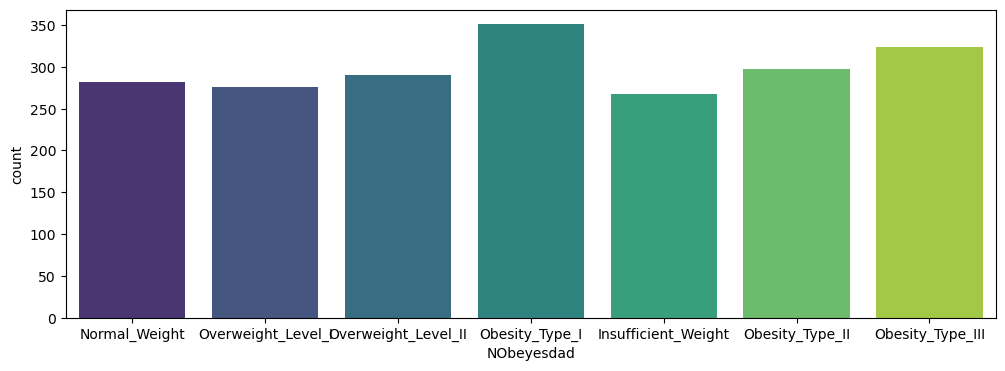

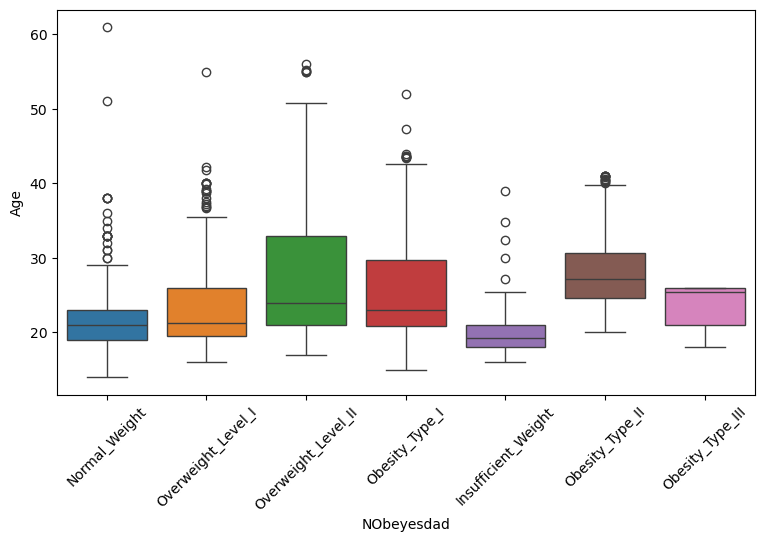

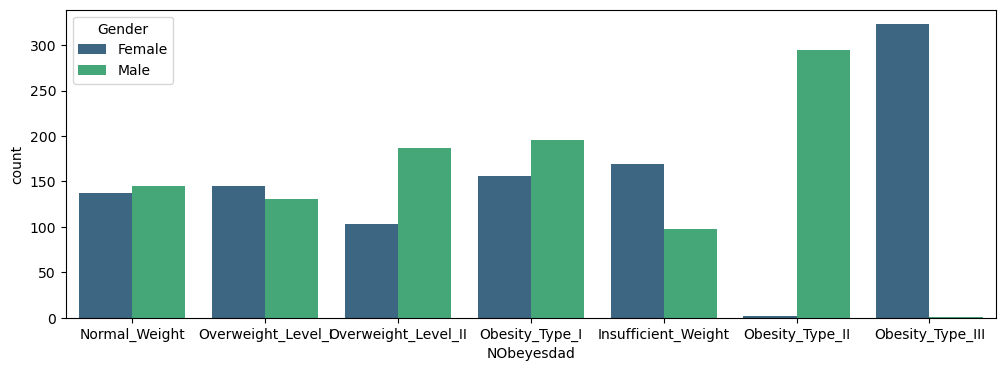

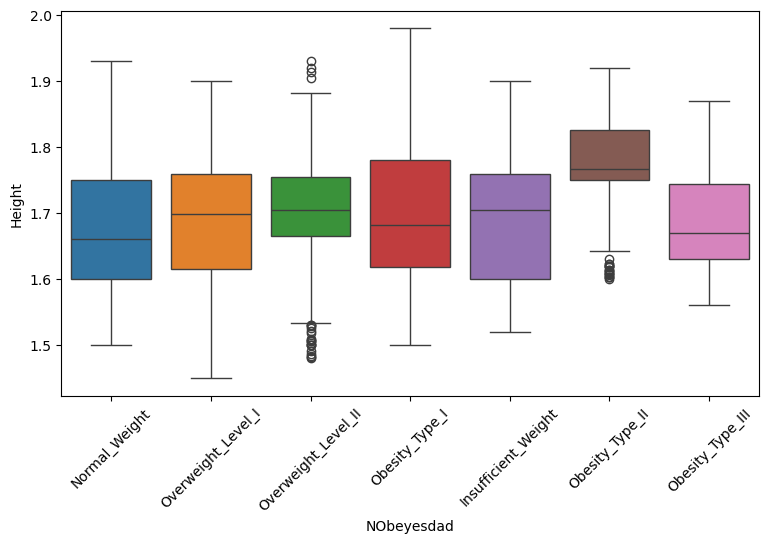

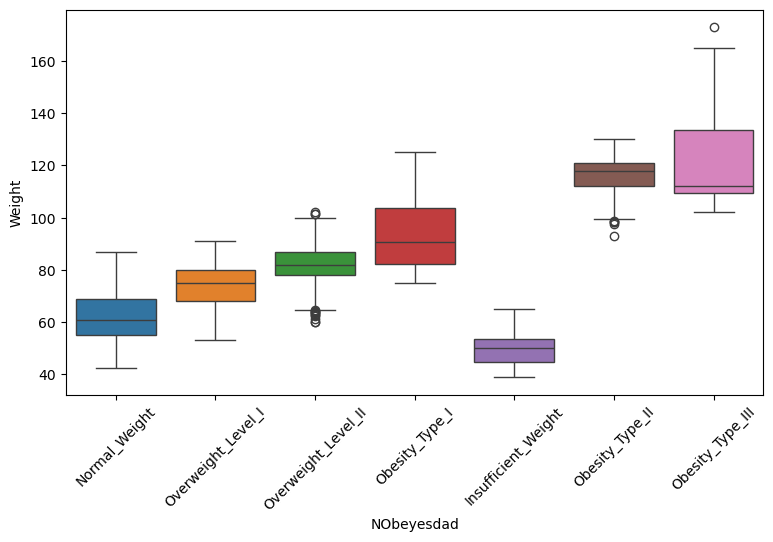

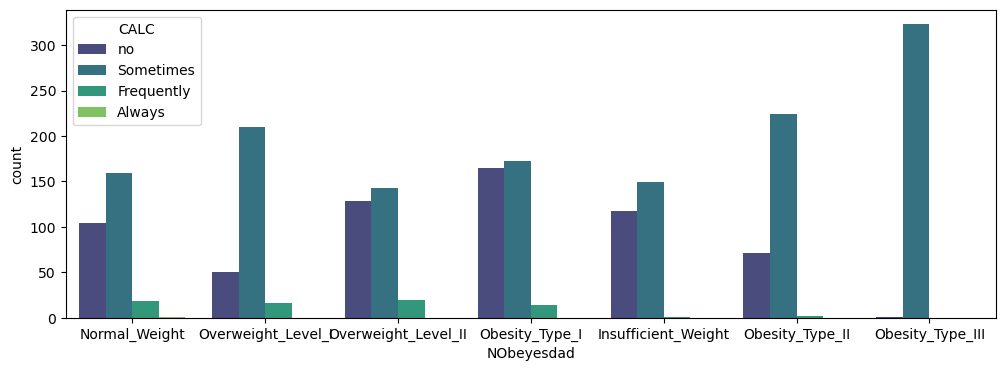

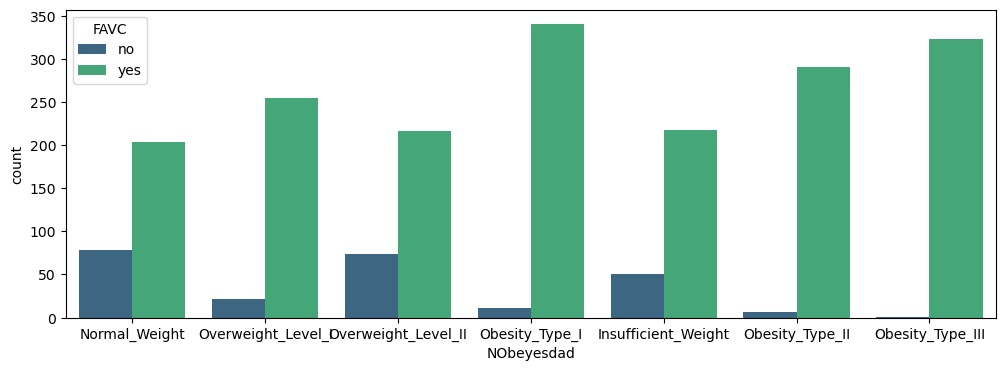

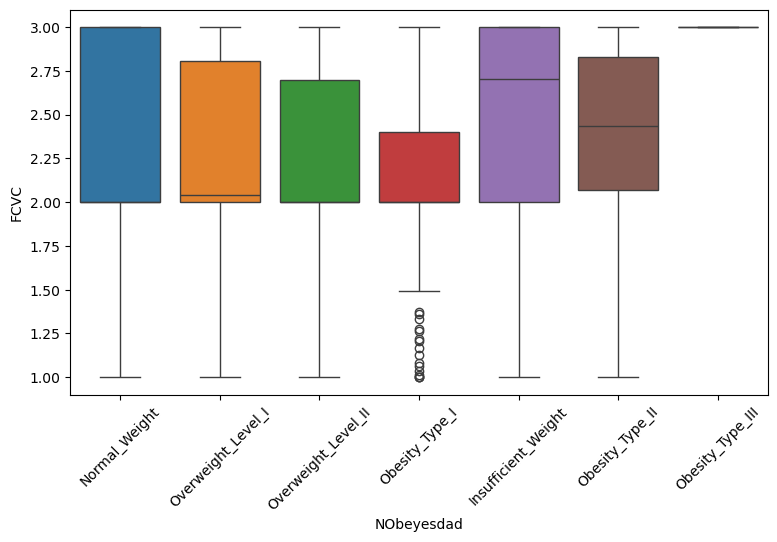

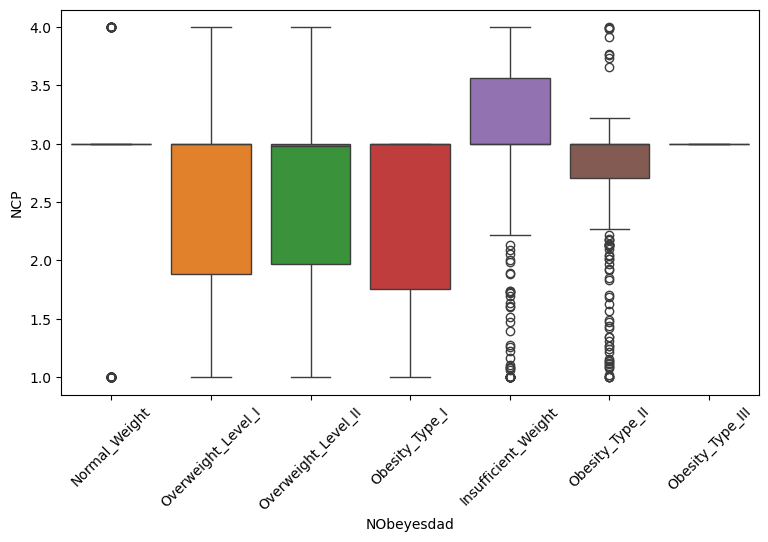

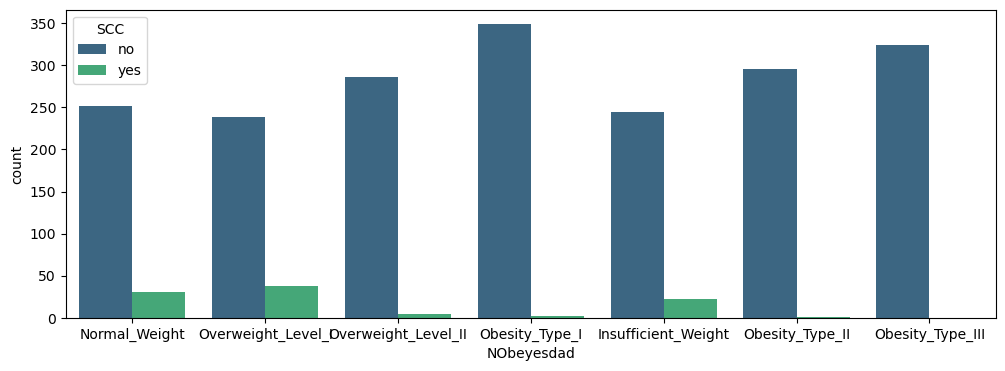

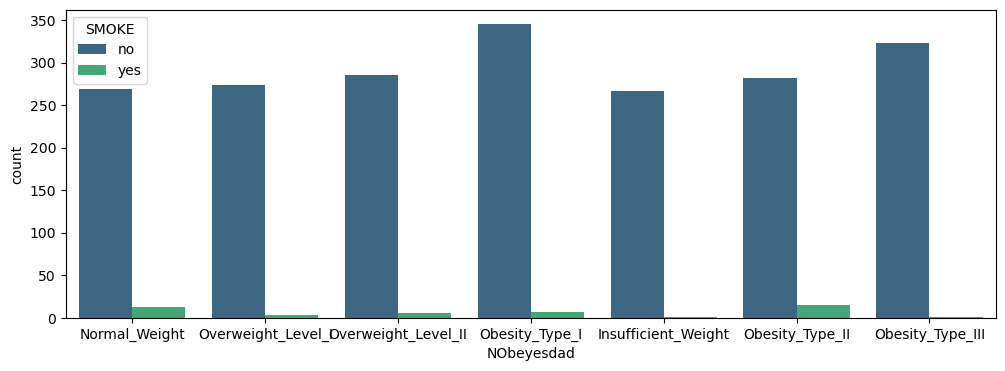

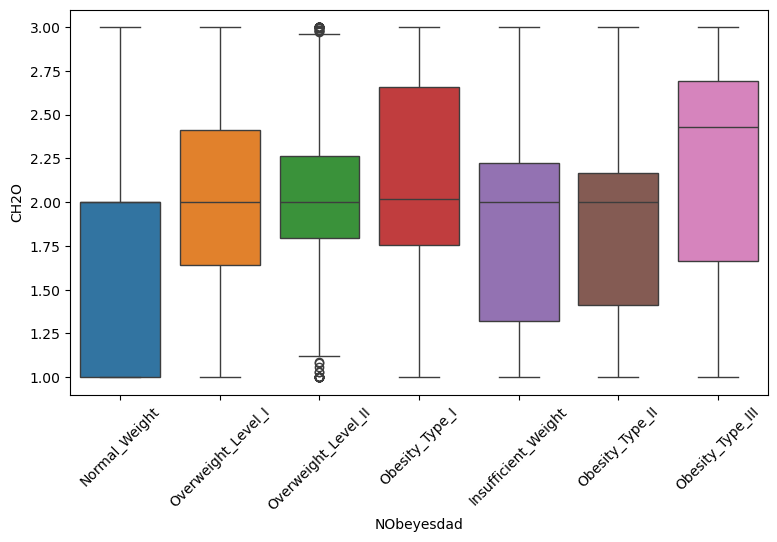

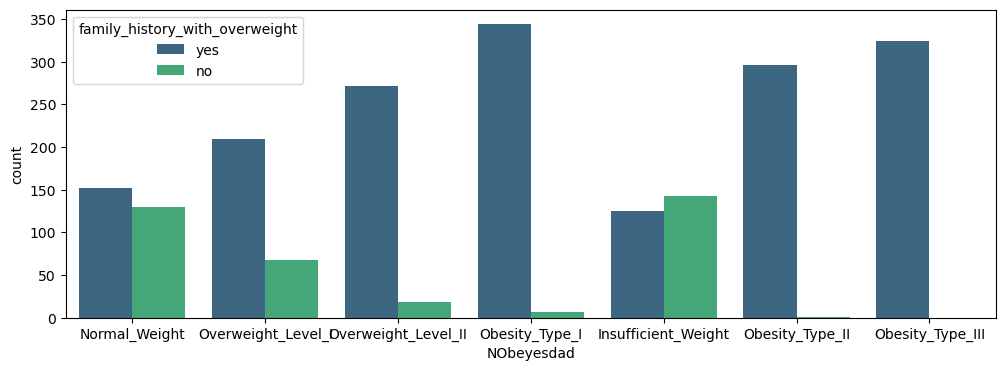

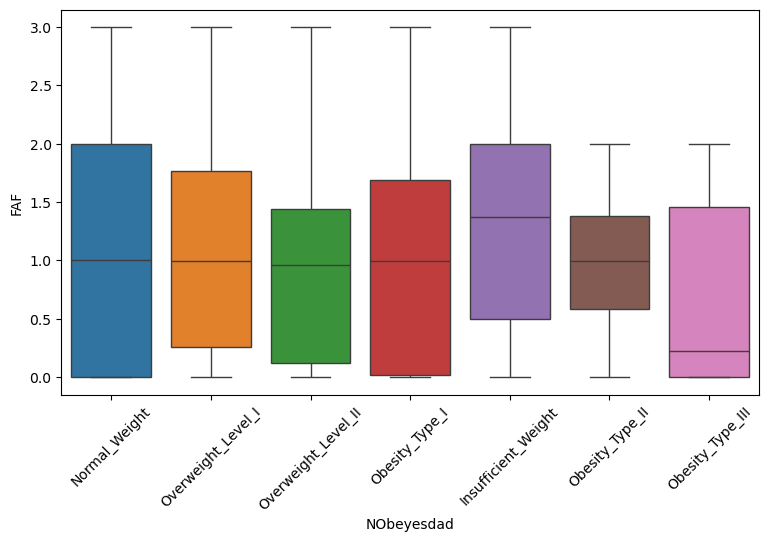

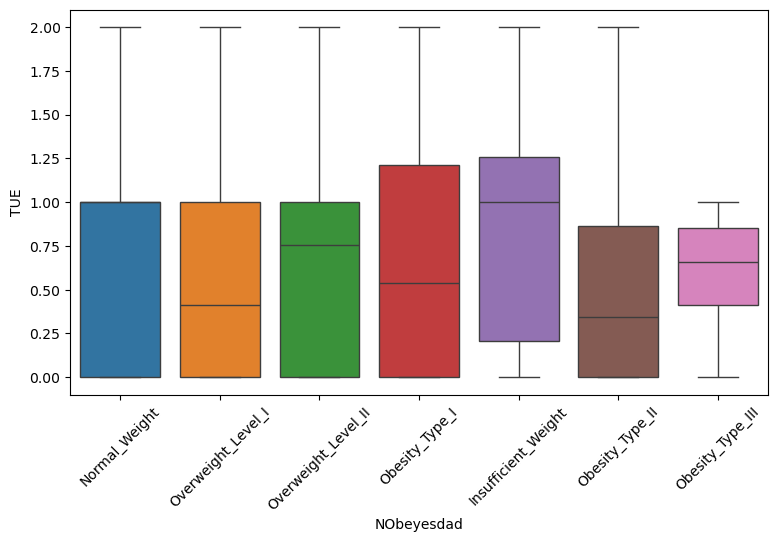

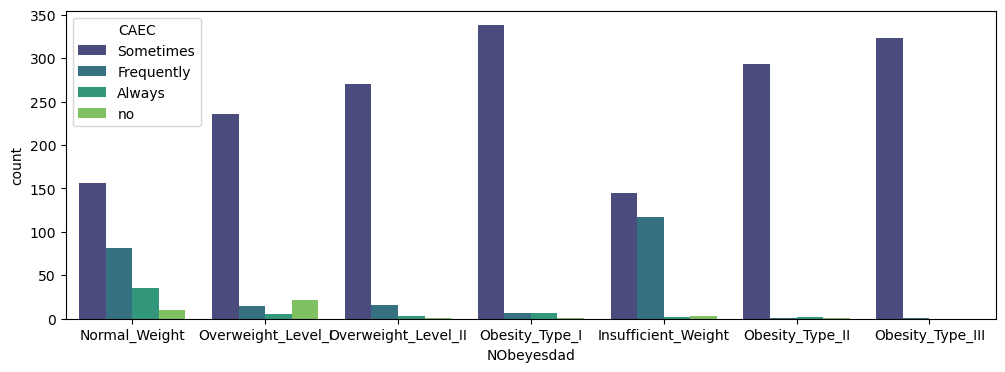

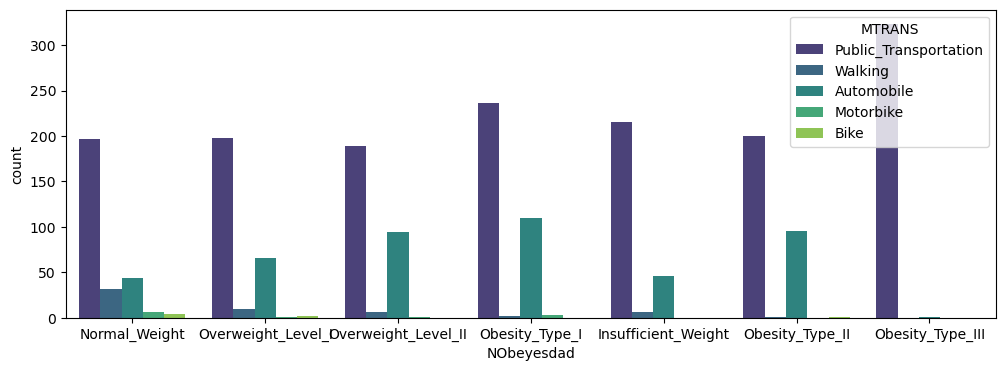

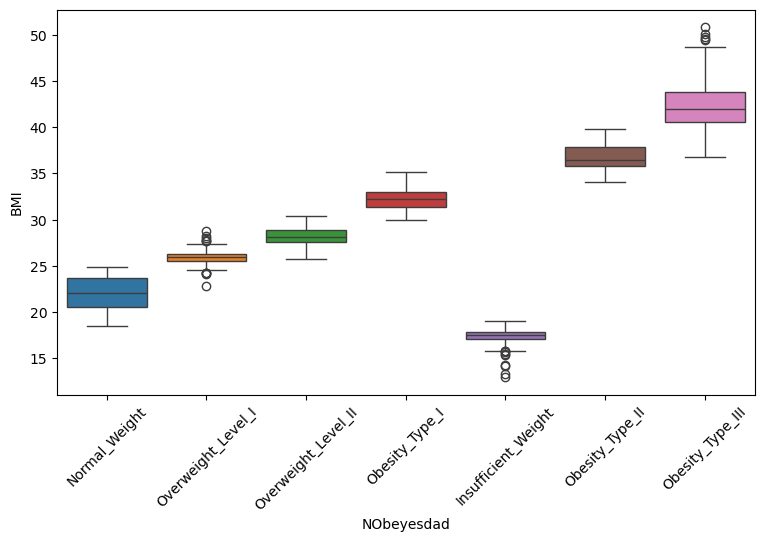

In [148]:
# Exploratory Data Analytics - EDA
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12, 4))
sns.countplot(x='NObeyesdad', data = df,  hue='NObeyesdad', palette='viridis')
plt.show()

# Create the boxplot and bar chart
categories = df['NObeyesdad'].unique().tolist()
columns = [col for col in df.columns if col != 'NObeyesdad']
for col in columns:
    if df[col].dtype != 'object':
        plt.figure(figsize = (9, 5))
        sns.boxplot(x='NObeyesdad',y=col, data = df,  hue='NObeyesdad', palette='tab10')
        plt.xticks(rotation = 45)
        plt.show()
    else:
        plt.figure(figsize = (12, 4))
        sns.countplot(x='NObeyesdad', data = df,  hue=col, palette='viridis')
        plt.show()

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Load the dataset

new_df = df.copy()
print(new_df.shape)



# Preprocessing
label_encoders = {}
for col in ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS','NObeyesdad']:
    le = LabelEncoder()
    new_df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

for col, le in label_encoders.items():
    mapping = {class_: index for index, class_ in enumerate(le.classes_)}
    print(f"{col} Mapping: {mapping}")

# Define features and target
X = new_df.drop(columns=['NObeyesdad','BMI'])  # Replace with actual column name
y = new_df['NObeyesdad']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

# Scale training and testing sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
randomforest = RandomForestClassifier(random_state=42)
randomforest.fit(X_train, y_train)

# Make predictions
y_pred_randomforest = randomforest.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_randomforest) * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_randomforest))

#XGBOOST Model

xgb = XGBClassifier(random_state=42) #Gradient Boosting (e.g., XGBoost)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb)*100)
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_dt)*100)
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

(2087, 18)
Gender Mapping: {'Female': 0, 'Male': 1}
family_history_with_overweight Mapping: {'no': 0, 'yes': 1}
FAVC Mapping: {'no': 0, 'yes': 1}
CAEC Mapping: {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
SMOKE Mapping: {'no': 0, 'yes': 1}
SCC Mapping: {'no': 0, 'yes': 1}
CALC Mapping: {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
MTRANS Mapping: {'Automobile': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Walking': 4}
NObeyesdad Mapping: {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}
Accuracy: 96.65%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96        59
           1       0.87      0.97      0.91        61
           2       1.00      0.97      0.99        70
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00    

In [122]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred_logreg = logreg.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg) * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Accuracy: 86.36%
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88        59
           1       0.84      0.61      0.70        61
           2       0.93      0.91      0.92        70
           3       0.97      1.00      0.98        64
           4       1.00      1.00      1.00        60
           5       0.73      0.75      0.74        55
           6       0.70      0.82      0.75        49

    accuracy                           0.86       418
   macro avg       0.86      0.86      0.85       418
weighted avg       0.87      0.86      0.86       418



In [123]:
from sklearn.svm import SVC
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Create and train the SVM model
svc = SVC(kernel='linear', C=3, random_state=42)
svc.fit(X_train, y_train)

# Make predictions
y_pred_svc = svc.predict(X_test)

# Evaluate the model
# train_score = svc.score(X_train_scaled, y_train) * 100
# test_score = svc.score(X_test_scaled, y_test) * 100

metrics = {
    "Test Score (%)": f"{test_score:.2f}",
    "Train Score (%)": f"{train_score:.2f}",
    "Accuracy Score": f"{accuracy_score(y_test, y_pred_svc) * 100:.2f}",    
    "Classification Report\n": classification_report(y_test, y_pred_svc)
}
print("\nModel Evaluation Results:\n" + "-"*30)

for metric, value in metrics.items():
    print(f"{metric: <20}: {value}")
print("-"*30)


Model Evaluation Results:
------------------------------
Test Score (%)      : 96.65
Train Score (%)     : 97.48
Accuracy Score      : 96.65
Classification Report
:               precision    recall  f1-score   support

           0       0.94      0.98      0.96        59
           1       0.98      0.92      0.95        61
           2       1.00      0.99      0.99        70
           3       0.98      1.00      0.99        64
           4       1.00      1.00      1.00        60
           5       0.96      0.89      0.92        55
           6       0.89      0.98      0.93        49

    accuracy                           0.97       418
   macro avg       0.96      0.97      0.96       418
weighted avg       0.97      0.97      0.97       418

------------------------------


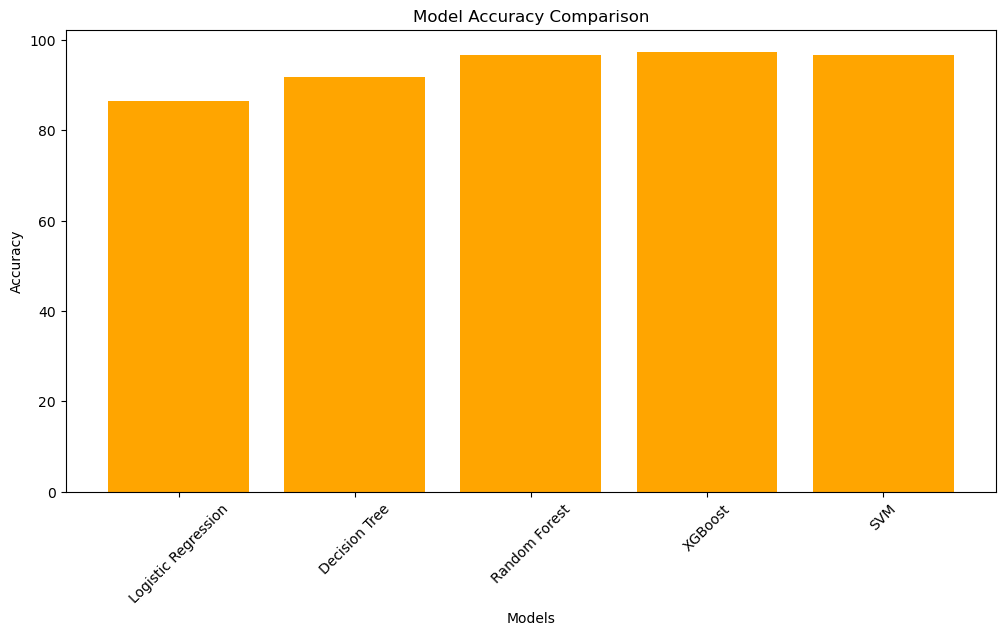

In [124]:
model_names = ['Logistic Regression','Decision Tree','Random Forest', 'XGBoost',
    'SVM'
]
accuracies = [
    accuracy_score(y_test, y_pred_logreg)* 100,
    accuracy_score(y_test, y_pred_dt)* 100,
    accuracy_score(y_test, y_pred_randomforest)* 100,
    accuracy_score(y_test, y_pred_xgb)* 100,
    accuracy_score(y_test, y_pred_svc)* 100,

]

# Plot model comparison
plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracies, color='orange')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.show()

In [146]:
input_data = pd.DataFrame([[29 # Age
                            ,0 # Gender
                            ,1.7 # Height
                            ,60 # Weight
                            ,2 # CALC - Alcohol
                            ,0 # FAVC - High calorie food
                            ,3 # FCVC - Eat Veg
                            ,2 # NCP - How many main meals
                            ,0 # SCC - Monitor Calorie
                            ,0 # Smoke 
                            ,2 # CH2O
                            ,1 # family history
                            ,3 # FAF - Physical activities
                            ,1 # TUE - Technology device
                            ,2 # CAEC - food between meals
                            ,0 #MTRANS - trasnportation
                           ]],columns=['Age','Gender','Height','Weight','CALC','FAVC','FCVC','NCP','SCC','SMOKE','CH2O','family_history_with_overweight','FAF','TUE','CAEC','MTRANS'])
input_bmi = input_data['Weight'] / (input_data['Height'] ** 2)
print(input_bmi)
predict_value = xgb.predict(input_data)
print(predict_value)

0    20.761246
dtype: float64
[4]
